# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [ ]:
.#importing libraries for data manipulation
import numpy as np
import pandas as pd
#importing libraries for data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#importing libraries for building a linear regression modle
import  statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn import linear_model

#ignore warnings
import warnings
warnings.filterwarnings("ignore")


SyntaxError: invalid syntax (<ipython-input-194-dca615f50868>, line 1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the dataset

In [ ]:
#load in data
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/MIT_elective_project/Boston.csv')

#preview data
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Data Overview

- Observations
- Sanity checks

In [ ]:
df.info() #There are 506 observations and 13 columns

#check for missing vals
print(df.isnull().sum()) #no missing vals

are_there_duplicates = df[df.duplicated()]
print(are_there_duplicates) #there are no duplicate observations

df.nunique() #check number of unique vals in each col

df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64
Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, LSTA

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


# **Observations:**

*   Df contains 506 observations and 13 columns
*   df contains no missing values
*   df contains no duplicate rows
*   all values in this data set are numerical (int-64 or float dtypes)

* Avg crime rate is 3% but it fluctuates wildly (min <0.05% to max 88%)
* STD and max for TAX col are very high --> check skew


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

CRIM
Skew : 5.22


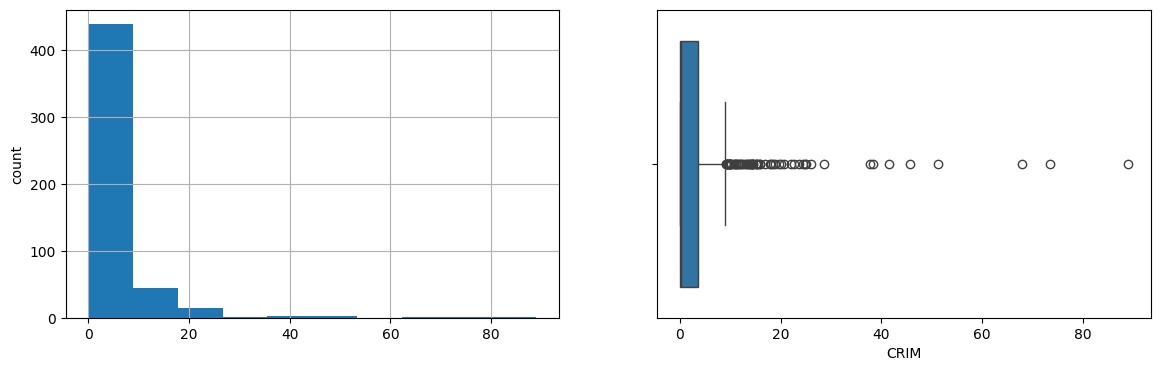

ZN
Skew : 2.23


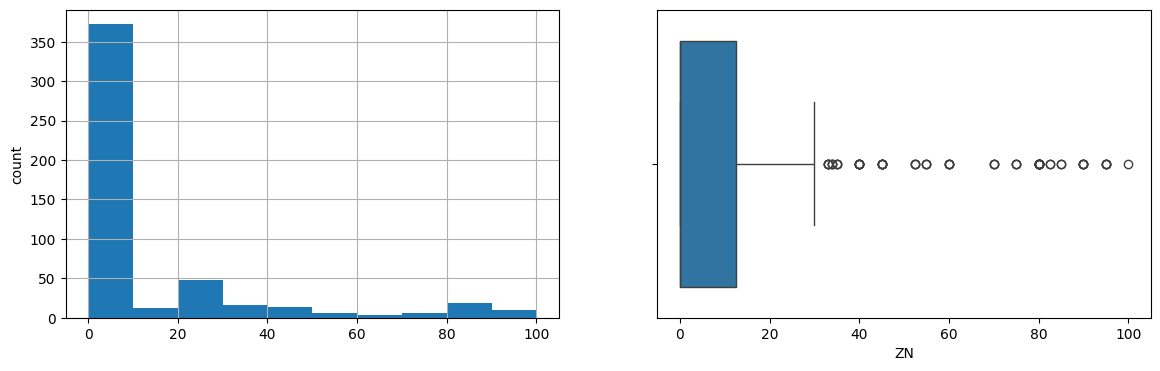

INDUS
Skew : 0.3


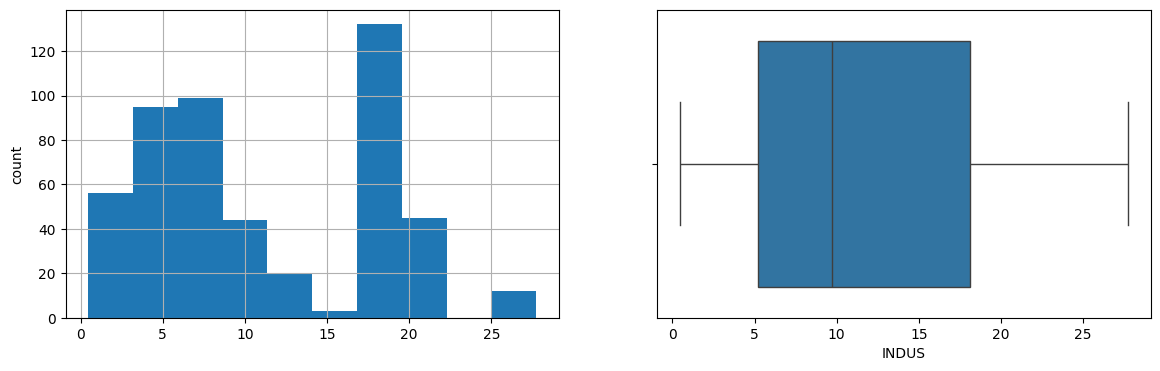

CHAS
Skew : 3.41


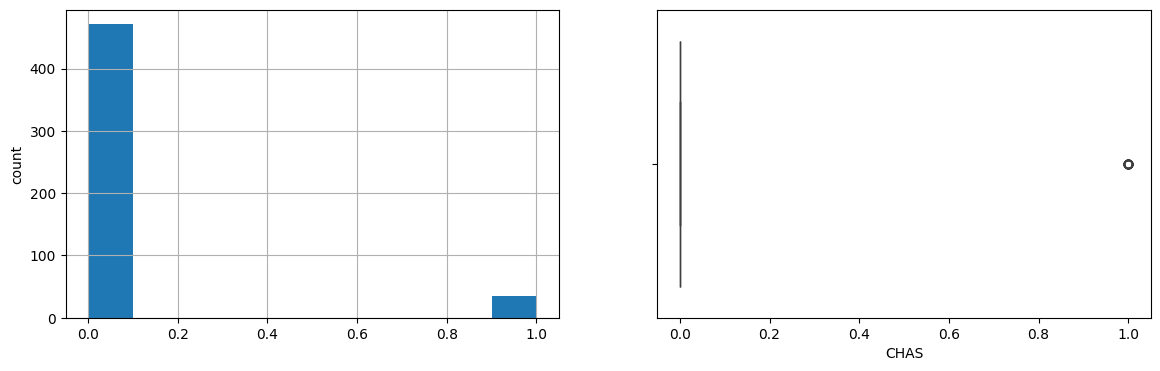

NOX
Skew : 0.73


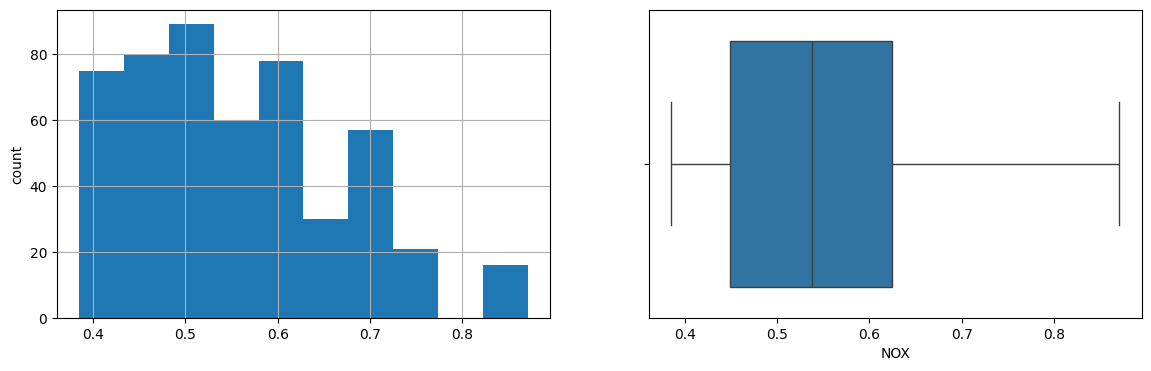

RM
Skew : 0.4


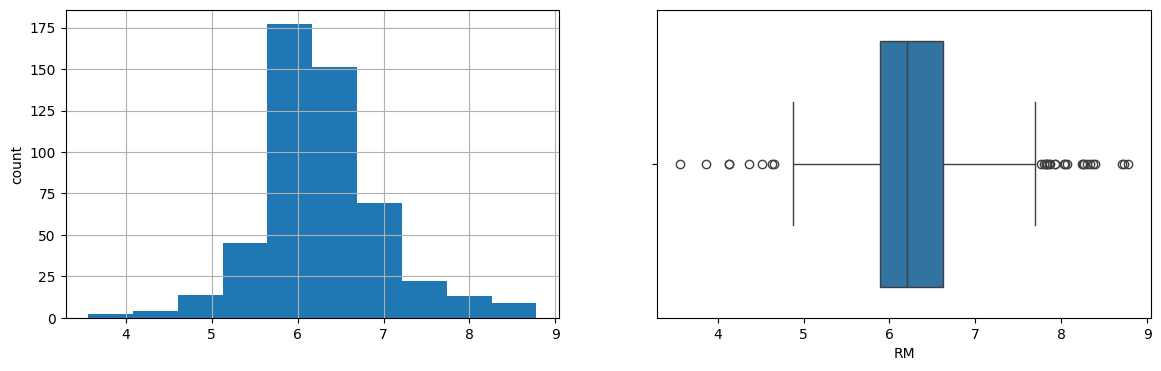

AGE
Skew : -0.6


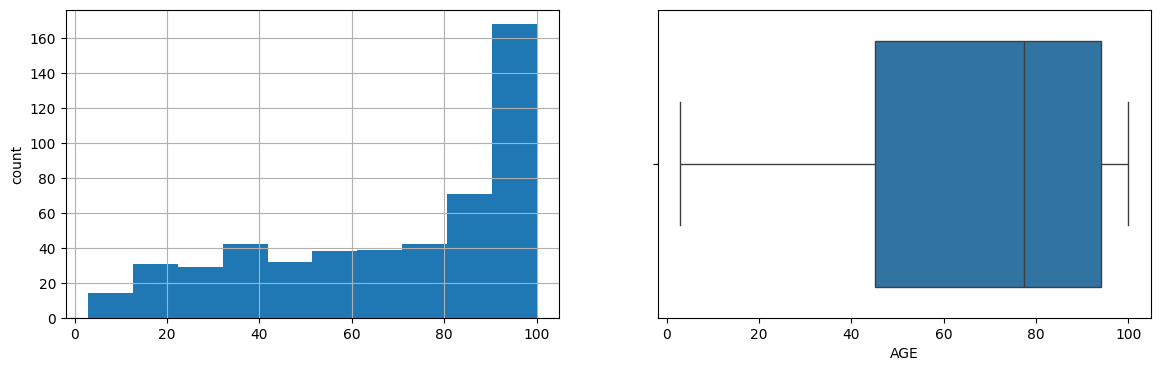

DIS
Skew : 1.01


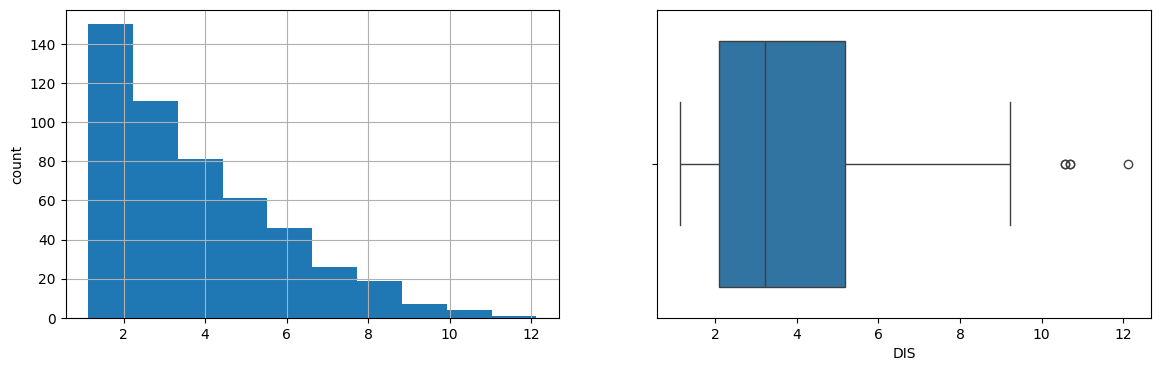

RAD
Skew : 1.0


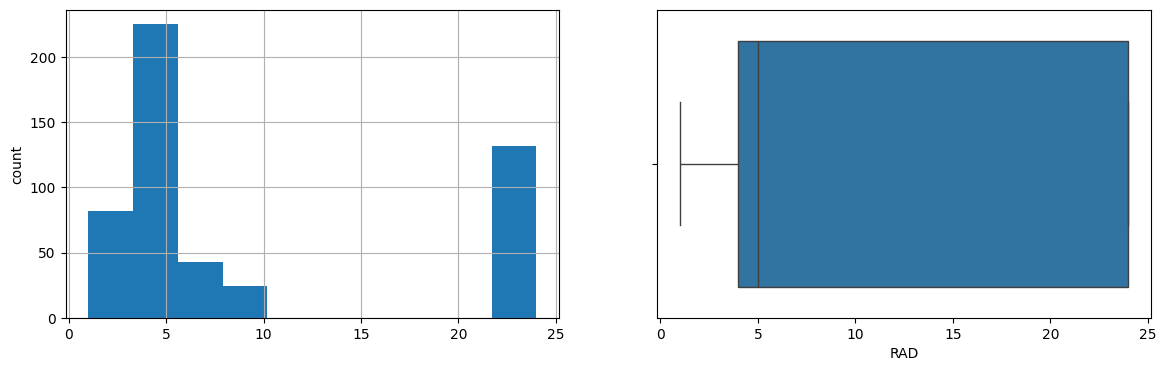

TAX
Skew : 0.67


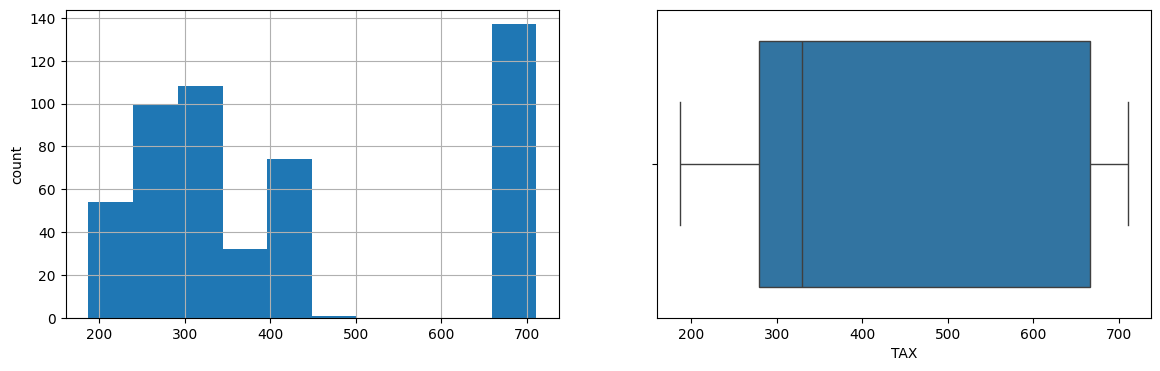

PTRATIO
Skew : -0.8


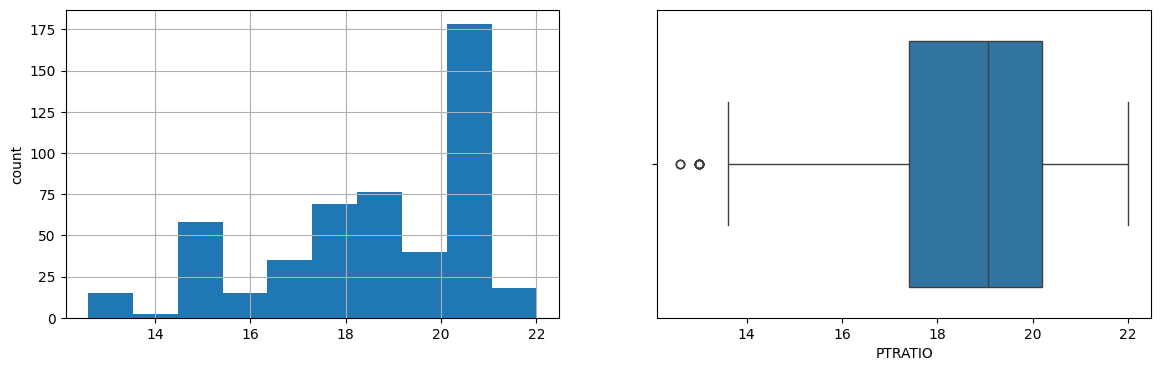

LSTAT
Skew : 0.91


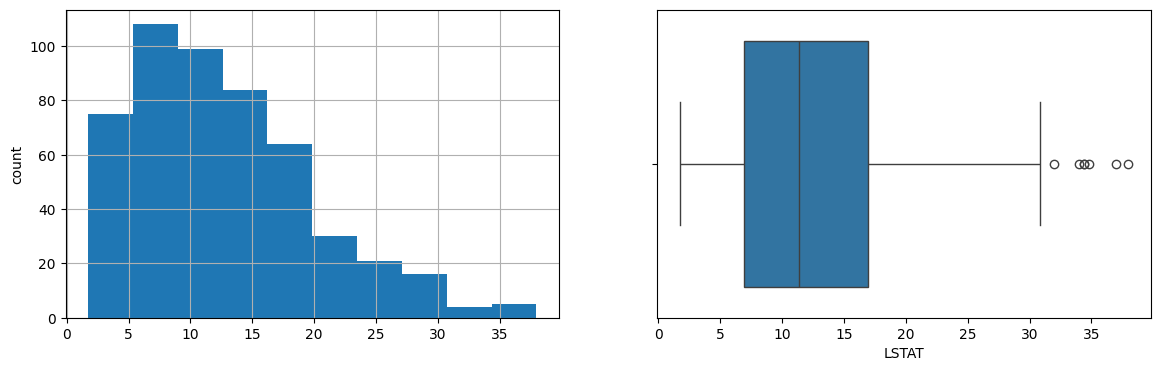

MEDV
Skew : 1.11


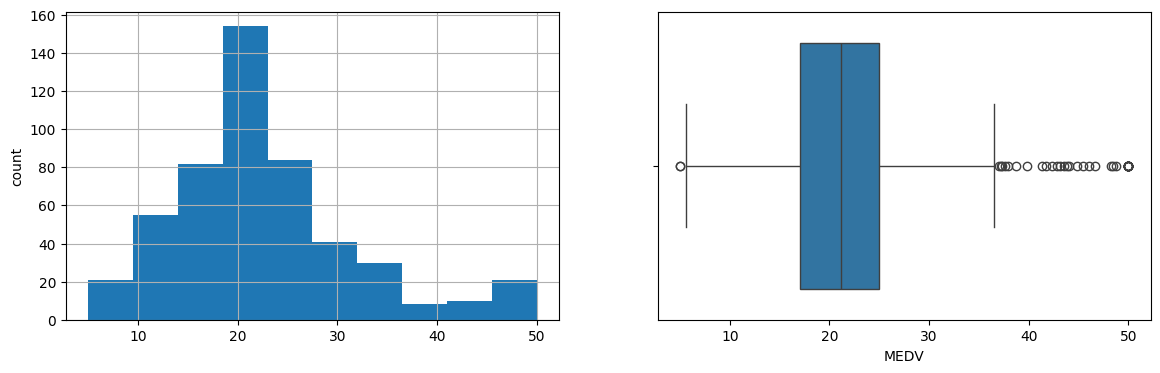

In [ ]:
#check for distribution and outliers for each col in data

col_names = list(df.columns)
#print(col_names)

for col in col_names:

  print(col)
  print('Skew :', round(df[col].skew(),2))

  plt.figure(figsize = (14, 4))
  plt.subplot(1, 2, 1)
  df[col].hist(figsize = (14, 4))
  plt.ylabel('count')
  plt.subplot(1, 2, 2)

  sns.boxplot(x = df[col])
  plt.show()

# **Observations**:

* CRIM, ZN, CHAS, DIS, and MEDV variables are all highly right skewed and include a lot of outliers (Note CHAS has skew bc its a 0/1 dummy variable)
* INDUS, NOX, RM, RAD, TAX and LSTAT have a moderate right skew
* AGE and PTRATIO have a moderate left skew
* INDUS, AGE, RAD, and TAX do not contain outliers in the boxplot

--

* majority of the MEDV values lie within the 10-30 range with a smaller amount skew towards 30-50
* A majority of records in this dataset have low CRIM values, but there are some outliers with very high values. This could indicate that most crime is concentrated within a few towns in the Boston area
* A majority of homes are in areas with less than 20% of lots over 25,000 sq ft being zoned for residential housing
* A majority of homes are not in areas bounded by a river
* There is a fairly uniform distribution for INDUS
* Most of records are in areas with lower to medium pollution (NOX) values
* The DIS histogram distribution indicates that very few homes are close to 5 Boston employment centers
* Many of the records tend towards a higher AGE, indicating that many homes in this dataset are likely to be in older areas
* There is a somewhat uniform distribution of PTRATIO in this dataset but it does skew towards larger class sizes for most areas
* A majority of homes are in areas with 10-25% LSTAT
* Average RM is around 6 with some variation

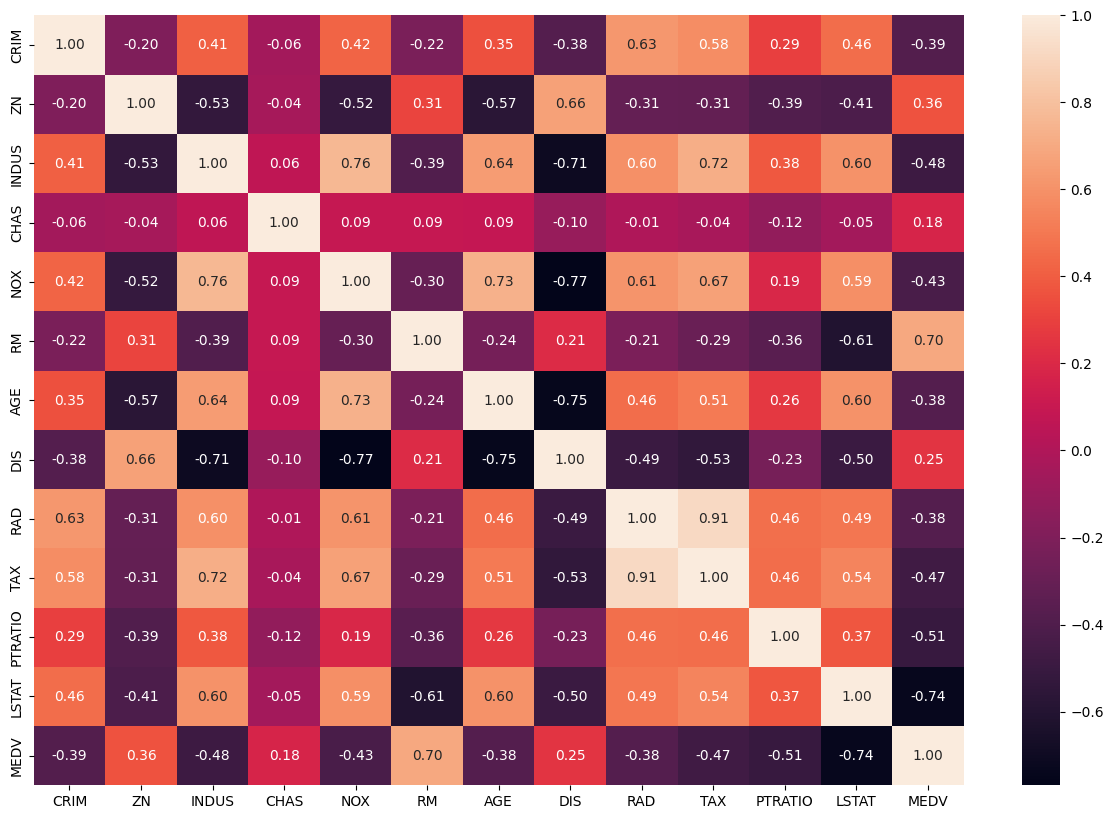

In [ ]:
#view heatmap correlation

plt.figure(figsize = (15, 10))
sns.heatmap(df.corr(), annot = True, fmt = '0.2f')
plt.show()

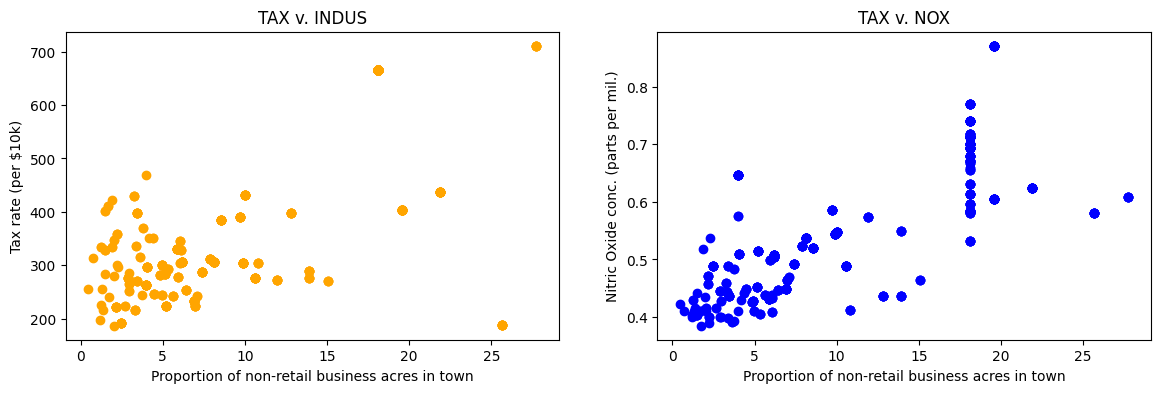

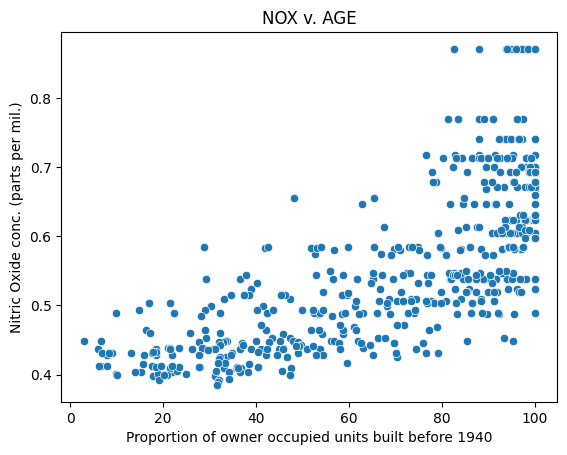

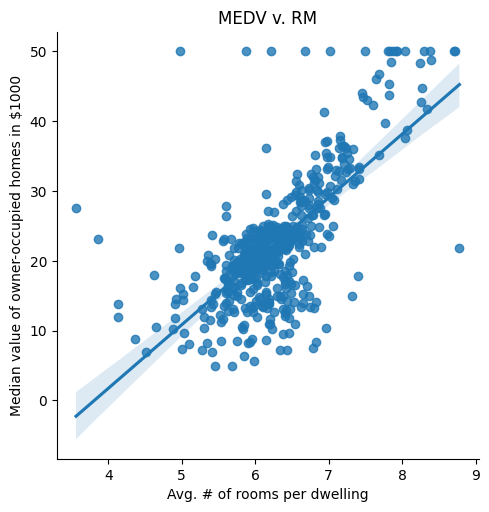

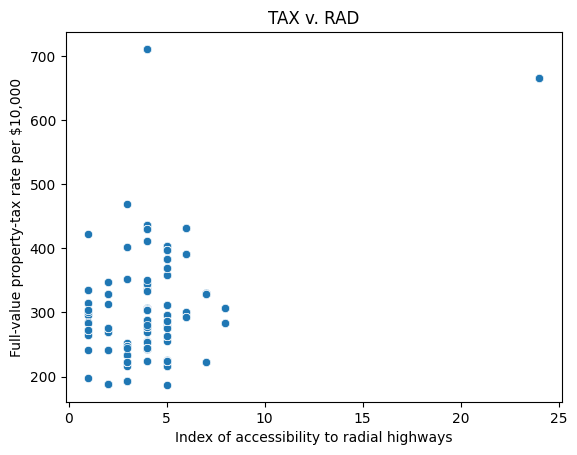

In [ ]:
#view relationship btwn INDUS & TAX, INDUS & NOX
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'INDUS', y = 'TAX', c = 'orange')
plt.title('TAX v. INDUS')
plt.xlabel('Proportion of non-retail business acres in town')
plt.ylabel('Tax rate (per $10k)')
plt.subplot(1, 2, 2)
plt.scatter(data = df, x = 'INDUS', y = 'NOX', c = 'blue')
plt.title('TAX v. NOX')
plt.xlabel('Proportion of non-retail business acres in town')
plt.ylabel('Nitric Oxide conc. (parts per mil.)')
plt.show()

#view relationship between NOX & AGE
sns.scatterplot(data = df, x = 'AGE', y = 'NOX')
plt.title("NOX v. AGE")
plt.ylabel('Nitric Oxide conc. (parts per mil.)')
plt.xlabel('Proportion of owner occupied units built before 1940')
plt.show()

#view relationship between MEDV & RM
sns.lmplot(data = df, y = 'MEDV', x = 'RM')
plt.title("MEDV v. RM")
plt.xlabel('Avg. # of rooms per dwelling')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.show()

#view relationship between RAD & TAX
sns.scatterplot(data = df, x = 'RAD', y = 'TAX')
plt.title("TAX v. RAD")
plt.xlabel('Index of accessibility to radial highways')
plt.ylabel('Full-value property-tax rate per $10,000')
plt.show()

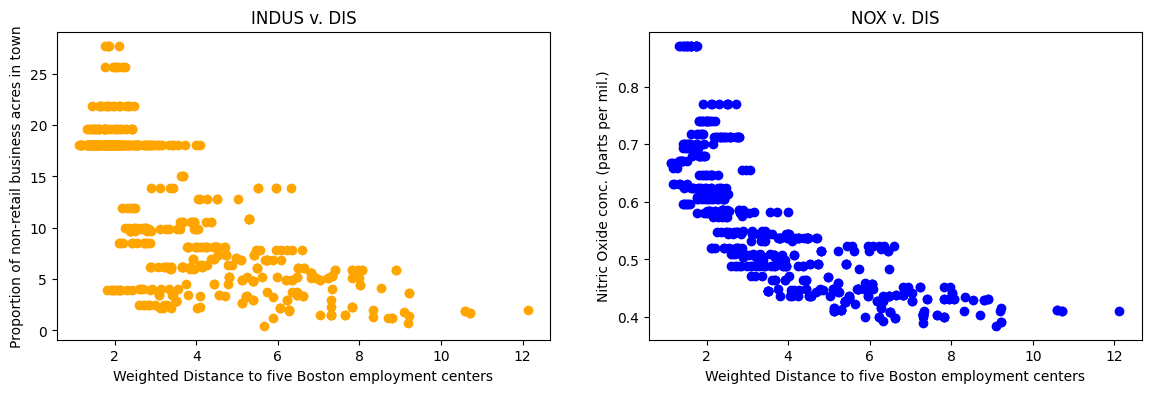

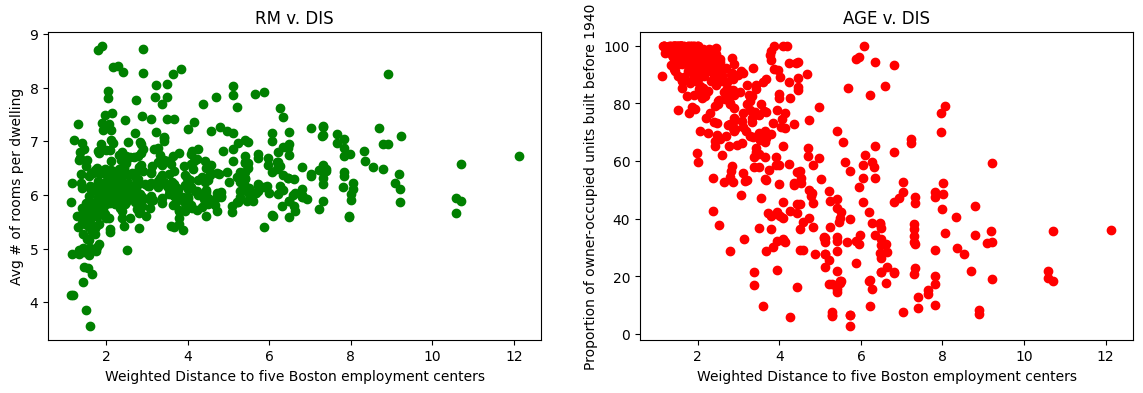

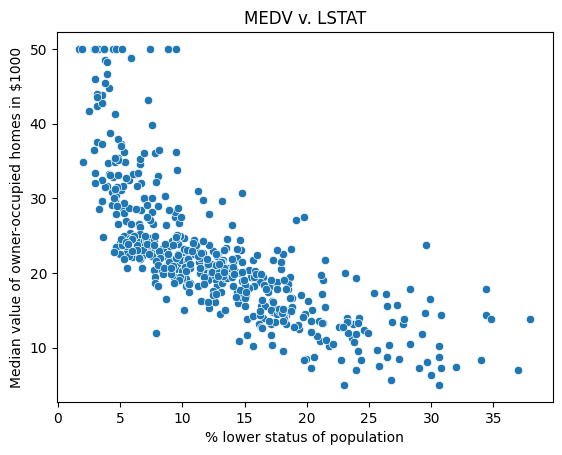

In [ ]:
#view relationship btwn DIS & INDUS, DIS & NOX, DIS & RM, DIS & AGE
plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'DIS', y = 'INDUS', c = 'orange')
plt.title('INDUS v. DIS')
plt.ylabel('Proportion of non-retail business acres in town')
plt.xlabel('Weighted Distance to five Boston employment centers')

plt.subplot(1, 2, 2)
plt.scatter(data = df, x = 'DIS', y = 'NOX', c = 'blue')
plt.title('NOX v. DIS')
plt.xlabel('Weighted Distance to five Boston employment centers')
plt.ylabel('Nitric Oxide conc. (parts per mil.)')
plt.show()

plt.figure(figsize = (14, 4))
plt.subplot(1, 2, 1)
plt.scatter(data = df, x = 'DIS', y = 'RM', c = 'green')
plt.title('RM v. DIS')
plt.xlabel('Weighted Distance to five Boston employment centers')
plt.ylabel('Avg # of rooms per dwelling')

plt.subplot(1, 2, 2)
plt.scatter(data = df, x = 'DIS', y = 'AGE', c = 'red')
plt.title('AGE v. DIS')
plt.xlabel('Weighted Distance to five Boston employment centers')
plt.ylabel('Proportion of owner-occupied units built before 1940')
plt.show()

#view relationship between MEDV & LSTAT
sns.scatterplot(data = df, x = 'LSTAT', y = 'MEDV')
plt.title("MEDV v. LSTAT")
plt.xlabel('% lower status of population')
plt.ylabel('Median value of owner-occupied homes in $1000')
plt.show()



# **Observations**

There is a Significant Positive Correlation (>= 0.7) between:


* INDUS & NOX, INDUS & TAX
* NOX & AGE
* RM & MEDV
* RAD & TAX

* The (+) correlation between INDUS (proportion of non-retail business acres per town) and NOX (Nitric Oxide concentration) is likely because non-retail business can encapsulate places like chemical factories, food processing and other industry which all incr pollution. NOX is also related to fuel consumption so people could be driving more in these areas or there may be more cars in these areas as well.

* There is also a (+) correlation between INDUS and TAX (full-value property-tax rate per 10,000$) which is likely because commercial buildings have different and often higher taxes than residential buildings

* The (+) correlation between NOX and AGE (proportion of owner-occupied units built before 1940) could indicate that areas with more older housing units are also more developed/industrialized, or that places with older housing units have become more densely occupied over time leading to a correlation with higher pollutant levels. NOX is also related to fuel consumption so people could be driving more in these areas or there may be more cars in these areas as well.

* The (+) correlation between RM (Average number of rooms per dwelling) and MEDV (Median value of owner occupied homes in 1000 dollars) is likely because areas with higher median home values are more likely to be wealthier than areas with lower median home values, and the homes themselves are likely to be larger leading to a greater amount of rooms.

* The (+) correlation between RAD (index of accessibility to radial highways) and TAX could be because proximity to highways increases the value of the surrounding area because it becomes a more desireable place to live. Interestingly there is a slight negative correlation between MEDV and RAD as well as MEDV and TAX which could indicate that being too close to a highway devalues a home. The slight negative correlation between MEDV and TAX could indicate that as the tax rate increases people do not invest as much into their home development, perhaps because higher property taxes leave less money for increasing home values.

---

There is a Significant Negative Correlation (<= -0.7) between:


* DIS & INDUS, DIS & NOX, DIS & RM, DIS & AGE
* LSTAT & MEDV

 * The (-) correlation between DIS (weighted distances to five Boston employment centers) and INDUS, NOX, RM, and AGE could indicate that the employment centers are further away from more established or larger towns/commercial spaces/transportation hubs. This could mean that employment centers are more likely to be in places where jobs are not plentiful.

 * The (-) correlation between LSTAT (% lower status of the population) and MEDV is likely because people deemed 'lower status' (which on investigation was in this dataset used to mean 'proportion of adults without, some high school education and proportion of male workers classified as laborers' according to dataset documentation) face more socioeconomic barriers and are less likely to live in areas with expensive median houses.

---

Other Observations:

* MEDV is negatively correlated to a certain extent with all variables in this dataset except for CHAS (area bounded by river), ZN (proportion of residential landzoned for lots over 25,000 sq. ft), RM and DIS. While not significant aside from RM, it could indicate that there is a slight tendency for areas with more expensive homes to be residential and to be located in more desireable geography (rivers are usually viewed positively). If places with higher MEDV are likely to be further from commercial centers/more populated areas then they could end up being somewhat positively correlated with DIS, as employment centers may also be further out from commercial centers/more populated areas.

* Variables INDUS, NOX, RM, PTRATIO, LSTAT and TAX score at or close to a .50 correlation to MEDV, so we would first look to those to use as predictors for our dependent variable

* CRIM is also somewhat positively correlated with indicators of greater population density/activity (INDUS, NOX, AGE, RAD, TAX, PRATIO) but not significantly.

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
print("1. there are no missing values in this datset so we can skip this step \n")
print("2. There are multiple values with a high skew in this dataset, lets log transform those:")


df2 = df.copy(deep = True) #create a new df to work with to preserve original

#create a list of cols in df2
col_names = list(df2.columns)
#print(col_names)
transformed_col = []
for col in col_names: #retrieve col w high skew and then log transform
  if np.abs(df[col].skew()) >= 0.29:
    transformed_col.append(col)
    df2[col] = np.log1p(df2[col])
print(transformed_col) #these are the ones that we will transform due to skew

df2.describe().T #check to make sure the chosen columns were transformed - good
#df.describe().T #check to make sure original df is not modified - good


1. there are no missing values in this datset so we can skip this step 

2. There are multiple values with a high skew in this dataset, lets log transform those:
['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT', 'MEDV']


,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,0.813418,1.022731,0.006300,0.078853,0.228336,1.542674,4.499545
ZN,506.0,0.953873,1.620831,0.000000,0.000000,0.000000,2.602690,4.615121
INDUS,506.0,2.302089,0.663362,0.378436,1.822935,2.369309,2.949688,3.358290
CHAS,506.0,0.047945,0.176055,0.000000,0.000000,0.000000,0.000000,0.693147
NOX,506.0,0.438587,0.072948,0.325700,0.370874,0.430483,0.484892,0.626473
RM,506.0,1.981139,0.096500,1.517542,1.929418,1.975261,2.031236,2.280339
AGE,506.0,4.112104,0.589774,1.360977,3.829184,4.363095,4.554666,4.615121
DIS,506.0,1.479648,0.413390,0.755934,1.131459,1.436855,1.822659,2.574633
RAD,506.0,2.054483,0.751839,0.693147,1.609438,1.791759,3.218876,3.218876
TAX,506.0,5.934259,0.395337,5.236442,5.634790,5.802118,6.502790,6.568078


## Model Building - Linear Regression

In [ ]:
#try linear regression first on this dataset

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score, mean_absolute_error
#first we remove our outcome variable from the feature set

X = df2.drop('MEDV', axis = 1)

#extract outcome variable seperately for a new dataset
Y = df2['MEDV']

#splitting the data into test and train

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

#check shapes
print("Shape of Training set : ", x_train.shape)
print("Shape of Test set : ", x_test.shape)

Shape of Training set :  (404, 12)
Shape of Test set :  (102, 12)


In [ ]:
#Function to compute adjusted R-squared

def adj_r2_score(predictors, targets, predictions):
  r2 = r2_score(targets, predictions)
  n = predictors.shape[0]
  k = predictors.shape[1]
  return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

#Function to compute MAPE

def mape_score(targets, predictions):
  return np.mean(np.abs(targets - predictions) / targets) * 100

# Function copute different metrics to check performance of a regression module
def model_performance_regression(model, predictors, target):
  """
  Function to compute different metrics to check regression model performance

  model: regressor
  predictors: independent variables
  target: dependent variable
  """

  pred = model.predict(predictors) #predict using independent variables
  r2 = r2_score(target, pred) #compute R-squared
  adjr2 = adj_r2_score(predictors, target, pred) #compute adjusted R-squared
  rmse = np.sqrt(mean_squared_error(target, pred)) # compute root mean squared error
  mae = mean_absolute_error(target, pred) # compute Mean absolute error
  mape = mape_score(target, pred) # compute mean absolute percentage error

  #Create a df of metrics
  df_perf = pd.DataFrame(
      {
        "RMSE": rmse,
        "MAE": mae,
        "R-squared": r2,
        "Adj. R-squared": adjr2,
        "MAPE": mape,
      },
      index = [0],
  )
  return df_perf

In [ ]:
import statsmodels.api as sm

#Statsmodel API does not add a constant by default so we add one manually

x_train1 = sm.add_constant(x_train) #add a constant to the train data
x_test1 = sm.add_constant(x_test) #add a constant to the test data

#train the model
olsmodel1 = sm.OLS(y_train, x_train1).fit()

print(olsmodel1.summary()) #view model summary

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     121.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          8.73e-124
Time:                        02:10:09   Log-Likelihood:                 129.02
No. Observations:                 404   AIC:                            -232.0
Df Residuals:                     391   BIC:                            -180.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4538      0.509     12.687      0.0

## Model Performance Check

1. How does the model is performing? Check using Rsquared, RSME, MAE, MAPE
2. Is there multicollinearity? Check using VIF
3. How does the model is performing after cross validation?

In [ ]:
#test our model performance
print('Linear regression on train data:')
lin_reg_train = model_performance_regression(olsmodel1, x_train1, y_train)
print(lin_reg_train)
print()

print('Linear regression on test data:')
lin_reg_test = model_performance_regression(olsmodel1, x_test1, y_test)
print(lin_reg_test)
print()
#use VIF to check for multicolinearity - high correlation between independent variables (linear regression assumes we dont have this)

from statsmodels.stats.outliers_influence import variance_inflation_factor

def checking_vif(train):
  vif = pd.DataFrame()
  vif['Features'] = train.columns

  vif['VIF'] = [variance_inflation_factor(train.values, i) for i in range(len(train.columns))]
  return vif
#VIF values with a score greater than 5 are dropped/treated til all the features have a VIF score of less than 5
print(checking_vif(x_train1))

Linear regression on train data:
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.175821  0.130838   0.788635         0.78159  4.412054

Linear regression on test data:
       RMSE       MAE  R-squared  Adj. R-squared      MAPE
0  0.176666  0.131735   0.807385         0.77893  4.538693

   Features          VIF
0     const  3272.993027
1      CRIM     5.699585
2        ZN     2.648166
3     INDUS     3.867942
4      CHAS     1.081635
5       NOX     5.046282
6        RM     1.885367
7       AGE     2.510862
8       DIS     5.094719
9       RAD     5.386970
10      TAX     5.010074
11  PTRATIO     1.892898
12    LSTAT     3.192783


**Observations:**

* We can observe that the R-squared for this model is ~0.78, and the adjusted R-squared is also around ~0.78, which suggests that this model can explain variance in MEDV up to 78%.
* The root mean squared error of the train and test data is very close, indicating that the model is not overfitting on the training data
* Mean absolute percentage error is 4% on the test data, indicating that the average differene between the predicted value and the actual value is around ~4%
* CRIM, NOX, DIS, RAD and TAX have VIF values over 5 so we will try dropping them and seeing what that does for our model (The constant is not a predictor so even though it has a very high VIF we can ignore)

In [ ]:
#dropping high VIF columns

x_train2 = x_train1.drop(['CRIM', 'NOX', 'DIS', 'RAD', 'TAX'], axis = 1)
x_test2 = x_test1.drop(['CRIM', 'NOX', 'DIS', 'RAD', 'TAX'], axis = 1)

olsmodel2 = sm.OLS(y_train, x_train2).fit()
print(olsmodel2.summary())

print("After dropping the chosen variables we now have very nice p-values")

#now check performance of new model

print("Performance on training data:")
print(model_performance_regression(olsmodel2, x_train2, y_train))
print()

print("Performance on test data:")
print(model_performance_regression(olsmodel2, x_test2, y_test))

print('\nNote: Dropping these variables decreased the accuracy of our model')


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.735
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     156.9
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          5.02e-110
Time:                        02:10:16   Log-Likelihood:                 83.336
No. Observations:                 404   AIC:                            -150.7
Df Residuals:                     396   BIC:                            -118.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5407      0.447     12.389      0.0

In [ ]:
#because dropping features based on VIF did not improve the accuracy of our model
#we will try dropping features based on high p-values instead

#dropping high p value columns aside from TAX

x_train3 = x_train1.drop(['ZN', 'INDUS', 'AGE' ], axis = 1)
x_test3 = x_test1.drop(['ZN', 'INDUS', 'AGE'], axis = 1)

olsmodel3 = sm.OLS(y_train, x_train3).fit()
print(olsmodel3.summary())

print("After dropping the chosen variables we now have very nice p-values\n")

#now check performance of new model

print("Performance on training data:")
print(model_performance_regression(olsmodel3, x_train3, y_train))
print()

print("Performance on test data:")
print(model_performance_regression(olsmodel3, x_test3, y_test))

print('\nNote: Dropping these variables DID increase the accuracy of our model')

print('\nRechecking VIF:')

print(checking_vif(x_train3))

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     161.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.33e-126
Time:                        02:10:20   Log-Likelihood:                 127.33
No. Observations:                 404   AIC:                            -234.7
Df Residuals:                     394   BIC:                            -194.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5387      0.499     13.114      0.0

**Observations:**

* Although VIF for CRIM and RAD is slightly above 5, it is not very much above it and removing it drops model accuracy by 5+ points so we will keep it in the model.
*New model gives an R-squared and Adj. R-squared of around .78 for the train data and an ~.81 R-squared and ~.79 Adj. R-squared for the test data/

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

Residual Mean:  -2.7810537151501446e-16
The residual mean is close to zero, assumption 1 is met

Normality of error terms:


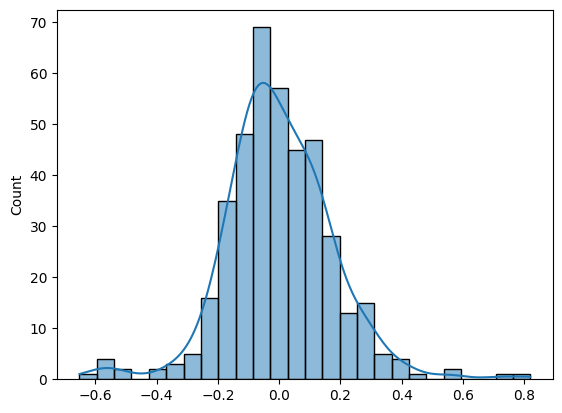

The error distribution is normally distributed, assumption 2 is met

Linearity of variables:


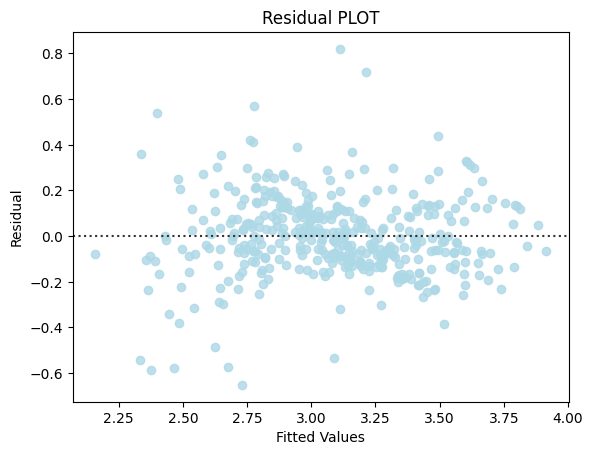

There is no clear pattern in the residual plot, assumption 3 is met

Homoscedacity:
[('F stastistic', 1.0910152098327286), ('p-value', 0.27337875955976626)]
The p-value is greater than 0.05, so we fail to reject the null hypothesis, assumption 4 is met

* We pass the assumptions required for a linear regression model


In [ ]:
'''
Assumptions for linear regression model:

1. Mean of residuals should be 0
2. Normality of error terms
3. Linearity of variables
4. No heteroscedasticity
'''

#check residuals

residual = olsmodel3.resid
print('Residual Mean: ', residual.mean())
print('The residual mean is close to zero, assumption 1 is met')

#check error normality with QQ plot
print('\nNormality of error terms:')
sns.histplot(residual, kde = True)
plt.show()
print('The error distribution is normally distributed, assumption 2 is met')

#check linearity of variables

fitted = olsmodel3.fittedvalues

print('\nLinearity of variables:')
sns.residplot(x = fitted, y = residual, color = 'lightblue')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title("Residual PLOT")
plt.show()
print('There is no clear pattern in the residual plot, assumption 3 is met')

#check for homoscedacity (variance of residuals being symmetrically distributed across the regression line)

from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

print('\nHomoscedacity:')
white_test = het_white(residual, x_train3)
name = ['F stastistic', 'p-value']
test = sms.het_goldfeldquandt(y_train, x_train3)
print(lzip(name, test))
print('The p-value is greater than 0.05, so we fail to reject the null hypothesis, assumption 4 is met')

print('\n* We pass the assumptions required for a linear regression model')

## Final Model

In [ ]:
#The final model is olsmodel3

x_train3 = x_train1.drop(['ZN', 'INDUS', 'AGE' ], axis = 1)
x_test3 = x_test1.drop(['ZN', 'INDUS', 'AGE'], axis = 1)

olsmodel3 = sm.OLS(y_train, x_train3).fit()
print(olsmodel3.summary())

print("After dropping the chosen variables we now have very nice p-values\n")

#now check performance of new model

print("Performance on training data:")
print(model_performance_regression(olsmodel3, x_train3, y_train))
print()

print("Performance on test data:")
print(model_performance_regression(olsmodel3, x_test3, y_test))



                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.787
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     161.6
Date:                Tue, 01 Oct 2024   Prob (F-statistic):          2.33e-126
Time:                        02:10:27   Log-Likelihood:                 127.33
No. Observations:                 404   AIC:                            -234.7
Df Residuals:                     394   BIC:                            -194.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.5387      0.499     13.114      0.0

## Actionable Insights and Recommendations

Below is the final model equation:

### **log(MEDV) = 6.5387 + (-0.1564)•log(CRIM) + (0.1333)•log(CHAS) + (-1.0157)•log(NOX) + (0.3270)•log(RM) + (-0.2718)•log(DIS) + (0.1649)•log(RAD) + (-0.1026)•log(TAX) + (-0.6176)•log(PTRATIO) + (-0.4161)•log(LSTAT)**

* From the above equation we can interpret that with unit change to NOX the outcome variable (log(MEDV)) decreases by 1.0157 units. This makes sense as townships where there is less pollution are likely nicer and therefore the house values are higher.

* The next two most impactful coefficients are PTRATIO (-0.6176) and LSTAT (-0.4161) indicating that with higher MEDV there is lower PTRATIO and LSTAT. This would correspond with wealthier areas having more expensive homes, as well as the ability to afford smaller class sizes for children and better educational outcomes of adults.

* Using this model we can capture around 78-80% of the variation within this dataset

* If the city wants to increase MEDV in low MEDV towns/suburbs, they could start with improving the quality of education (smaller class sizes and provide incentives for people without highschool degrees to get their GED) and decreasing the pollution (air and water quality etc.) Better educational opportunities and cleaner areas will naturally make a town more desireable to live in.

___